## Access Radar Northwestshelf Velocity Hourly Averaged Delayed QC data in Zarr
A jupyter notebook to show how to access and plot the AODN radar_NorthWestShelf_velocity_hourly_averaged_delayed_qc dataset available as a [Zarr](https://zarr.dev/) dataset on S3.

More information about the dataset available [here](https://catalogue-imos.aodn.org.au/geonetwork/srv/eng/catalog.search#/metadata/23c27e4f-c982-44e9-9ab7-71094d297549).

In [1]:
dataset_name = "radar_NorthWestShelf_velocity_hourly_averaged_delayed_qc"

## Install/Update packages and Load common functions

In [2]:
import os, requests, importlib.util

open('setup.py', 'w').write(requests.get('https://raw.githubusercontent.com/aodn/aodn_cloud_optimised/main/notebooks/setup.py').text)

spec = importlib.util.spec_from_file_location("setup", "setup.py")
setup = importlib.util.module_from_spec(spec)
spec.loader.exec_module(setup)

setup.install_requirements()
setup.load_dataquery()

Using CPython 3.12.6 interpreter at: /home/lbesnard/miniforge3/envs/AodnCloudOptimised/bin/python
Creating virtual environment at: .venv
Activate with: source .venv/bin/activate
Audited 240 packages in 31ms


✅ Local version 0.2.2 is up to date (remote: 0.2.2)


In [3]:
from DataQuery import GetAodn

# Understanding the Dataset

In [4]:
aodn = GetAodn()
dname = f'{dataset_name}.zarr'
%time aodn_dataset = aodn.get_dataset(dname)

CPU times: user 485 ms, sys: 68.4 ms, total: 554 ms
Wall time: 1.07 s


In [5]:
ds = aodn_dataset.zarr_store
ds.info()

xarray.Dataset {
dimensions:
	TIME = 16215 ;
	LATITUDE = 51 ;
	LONGITUDE = 55 ;

variables:
	float64 GDOP(TIME, LATITUDE, LONGITUDE) ;
		GDOP:comment = This angle is used to assess the impact of Geometric Dilution of Precision. If angle >= 150 or <= 30, then QC flag will not be lower than 4 (see abstract). ;
		GDOP:long_name = radar beam intersection angle ;
		GDOP:units = Degrees ;
		GDOP:valid_max = 180.0 ;
		GDOP:valid_min = 0.0 ;
	float64 LATITUDE(LATITUDE) ;
		LATITUDE:axis = Y ;
		LATITUDE:long_name = latitude ;
		LATITUDE:reference_datum = geographical coordinates, WGS84 datum ;
		LATITUDE:standard_name = latitude ;
		LATITUDE:units = degrees_north ;
		LATITUDE:valid_max = 90.0 ;
		LATITUDE:valid_min = -90.0 ;
	float64 LONGITUDE(LONGITUDE) ;
		LONGITUDE:axis = X ;
		LONGITUDE:long_name = longitude ;
		LONGITUDE:reference_datum = geographical coordinates, WGS84 datum ;
		LONGITUDE:standard_name = longitude ;
		LONGITUDE:units = degrees_east ;
		LONGITUDE:valid_max = 180.0 ;
		LON

## Plot time coverage

In [6]:
aodn_dataset.get_temporal_extent()

(Timestamp('2021-04-01 00:30:00.000003072'),
 Timestamp('2024-09-30 23:29:59.999996928'))

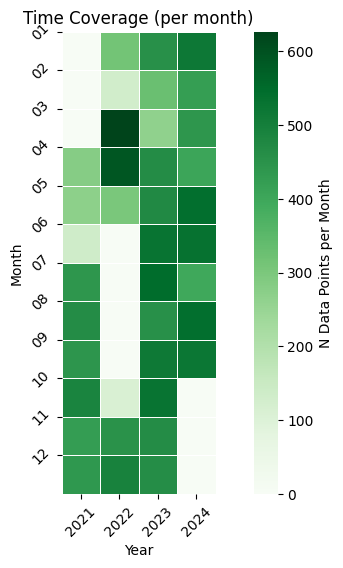

In [7]:
aodn_dataset.plot_time_coverage()

## Plot a gridded variable

/home/lbesnard/github_repo/aodn_cloud_optimised/notebooks/DataQuery.py:795: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Leave space for the colorbar


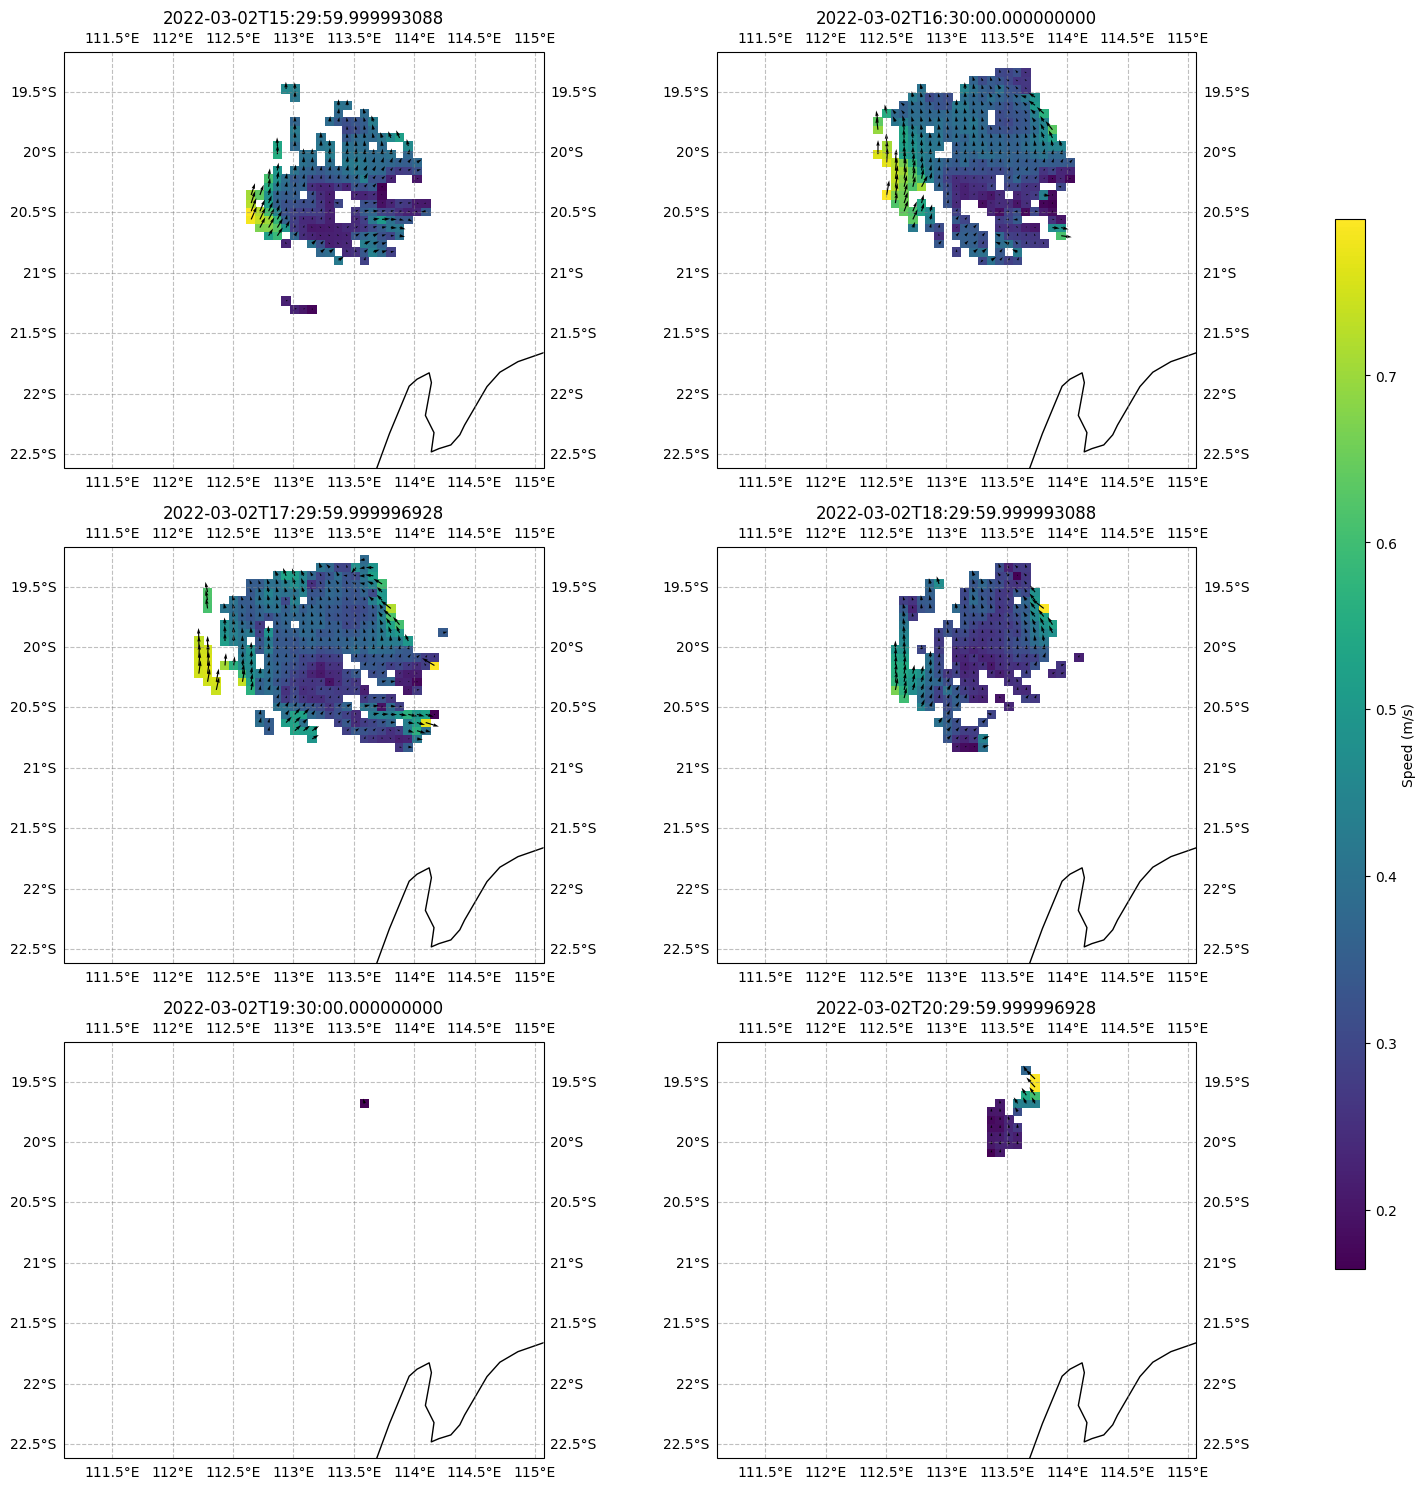

CPU times: user 2.56 s, sys: 2.01 s, total: 4.57 s
Wall time: 2.99 s


In [8]:
%%time
aodn_dataset.plot_radar_water_velocity_gridded(date_start='2022-03-02')

<Figure size 800x800 with 0 Axes>

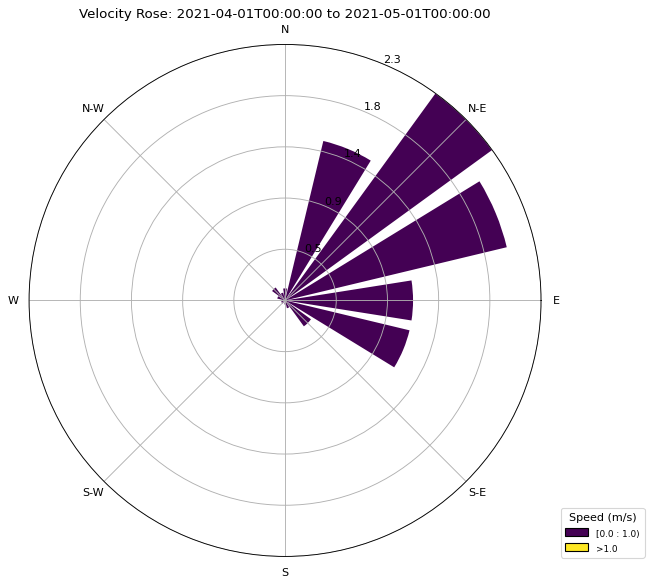

CPU times: user 198 ms, sys: 140 ms, total: 338 ms
Wall time: 287 ms


In [9]:
%%time
aodn_dataset.plot_radar_water_velocity_rose(date_start='2021-04-01T00:00:00', 
                                            date_end='2021-05-01T00:00:00')